2023-04-28 15:28:21.927615: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-28 15:28:21.929867: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 15:28:21.990922: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-28 15:28:21.991919: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-28 15:28:22.909365: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Epoch 1/30


2023-04-28 15:28:26.899381: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 15:28:26.904040: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 15:28:26.906726: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

361/361 - 16s - loss: 0.0407 - val_loss: 0.0019 - 16s/epoch - 44ms/step
Epoch 2/30
361/361 - 7s - loss: 0.0049 - val_loss: 0.0021 - 7s/epoch - 18ms/step
Epoch 3/30
361/361 - 9s - loss: 0.0042 - val_loss: 0.0011 - 9s/epoch - 24ms/step
Epoch 4/30
361/361 - 9s - loss: 0.0036 - val_loss: 7.2411e-04 - 9s/epoch - 24ms/step
Epoch 5/30
361/361 - 6s - loss: 0.0032 - val_loss: 8.8222e-04 - 6s/epoch - 18ms/step
Epoch 6/30
361/361 - 6s - loss: 0.0032 - val_loss: 6.5435e-04 - 6s/epoch - 18ms/step
Epoch 7/30
361/361 - 6s - loss: 0.0031 - val_loss: 9.6800e-04 - 6s/epoch - 17ms/step
Epoch 8/30
361/361 - 6s - loss: 0.0026 - val_loss: 5.0072e-04 - 6s/epoch - 17ms/step
Epoch 9/30
361/361 - 7s - loss: 0.0026 - val_loss: 3.6604e-04 - 7s/epoch - 19ms/step
Epoch 10/30
361/361 - 6s - loss: 0.0025 - val_loss: 0.0010 - 6s/epoch - 17ms/step
Epoch 11/30
361/361 - 6s - loss: 0.0025 - val_loss: 3.1896e-04 - 6s/epoch - 17ms/step
Epoch 12/30
361/361 - 7s - loss: 0.0021 - val_loss: 7.9061e-04 - 7s/epoch - 19ms/step
Ep

2023-04-28 15:32:17.004920: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-28 15:32:17.010139: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-28 15:32:17.014415: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

361/361 [==============================] - 2s 5ms/step
Train Score: 0.07 RMSE
Test Score: 0.05 MAE


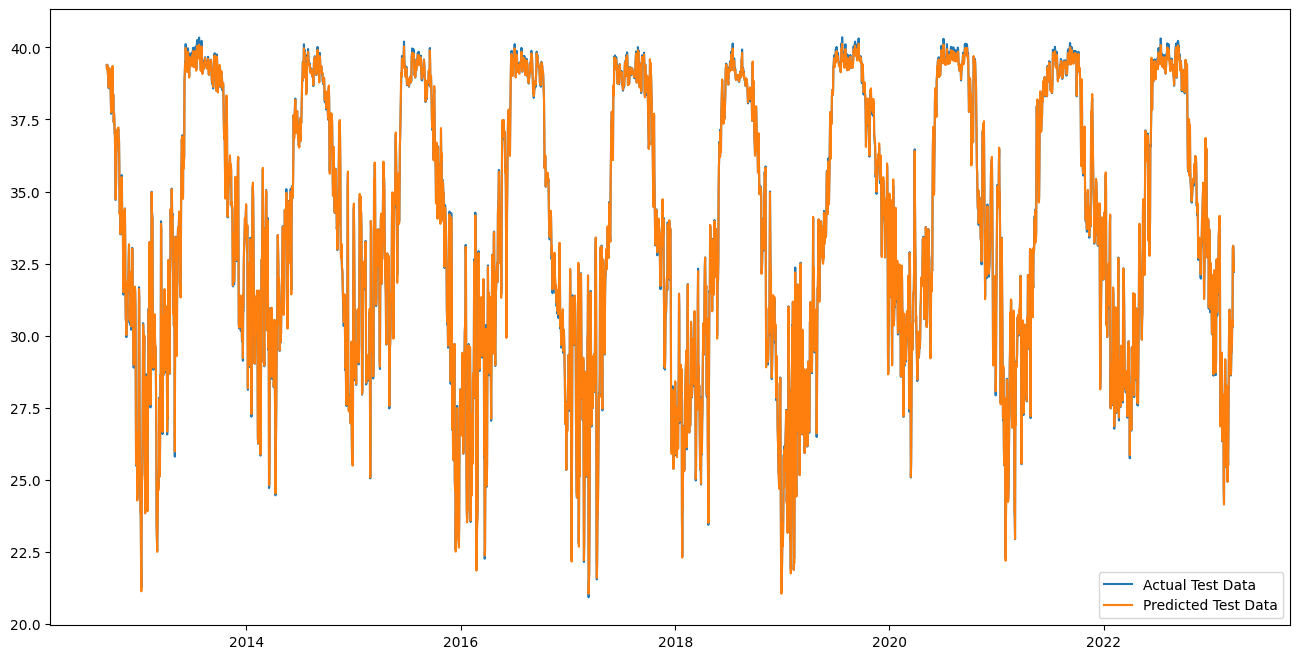

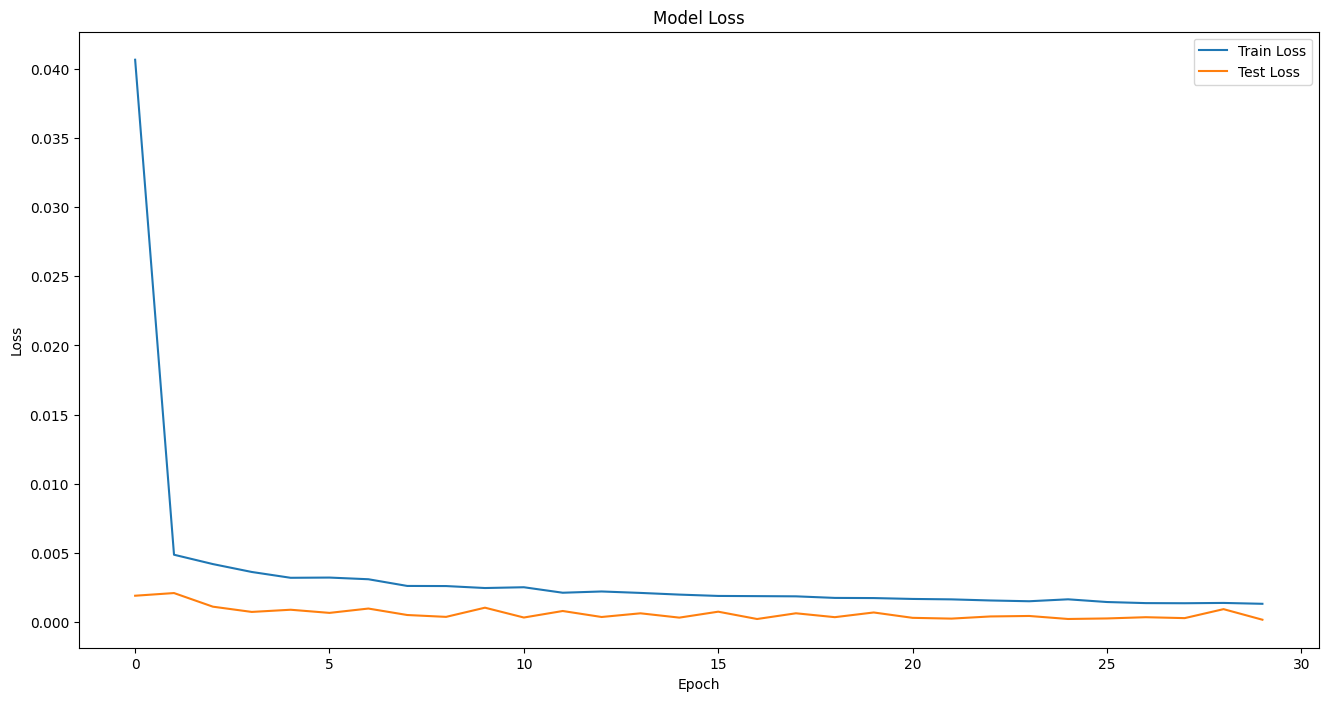

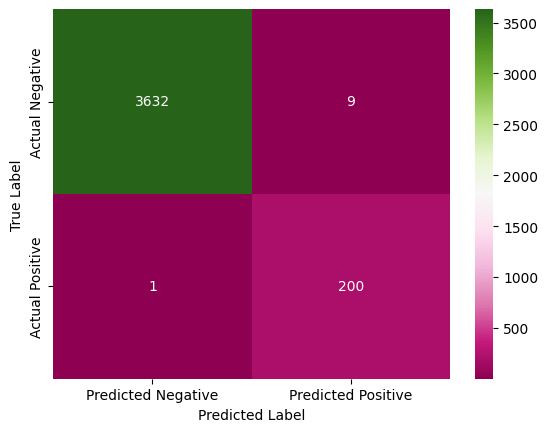

Occurred Heatwaves between 2012 & 2022 ->  201
Predicted Heatwaves between 2012 & 2022 ->  209
Heatwave Prediction accuracy: 99.74%


In [1]:
from model import *
from data_utils import *
from visualization import *
from data_preprocessing import *
from heatwave_predict import *

# load and preprocess data
df = preprocess_data('../Dataset/Indore.csv')

# scale data
scaler, scaled = scale_data(df)

# split data into train and test sets
train, test = split_train_test(scaled)

# prepare data for LSTM model
n_steps_in = 7
n_steps_out = 1
trainX, trainY = prepare_data(train, n_steps_in, n_steps_out)
testX, testY = prepare_data(test, n_steps_in, n_steps_out)

# define and fit the LSTM model
model = build_model(trainX, n_steps_in, n_steps_out)
history = model.fit(trainX, trainY, epochs=30, batch_size=32, validation_data=(testX, testY), verbose=2)

# make predictions and evaluate the model
rmseScore, maeScore, predictTemp, realTemp = evaluate_model(model, scaler, testX, testY)
rmseScore_, maeScore_, predictTemp_, realTemp_ = evaluate_model(model, scaler, trainX, trainY)
print('Train Score: %.2f RMSE' % (rmseScore))
print('Test Score: %.2f MAE' % (maeScore))

# plot the predicted and actual temperatures
date = df.tail(realTemp.shape[0]).index
plot_train_test_predictions(realTemp, predictTemp, date)
plot_loss(history)

# predict the heatwave
occurredHeatwave, predictedHeatwave, accuracy = predict_heatwave(predictTemp, realTemp, realTemp_, df)
print("Occurred Heatwaves between 2012 & 2022 -> ", occurredHeatwave)
print("Predicted Heatwaves between 2012 & 2022 -> ", predictedHeatwave)
print(f"Heatwave Prediction accuracy: {accuracy*100:.2f}%")